### 데이터 시각화
- 심박수와 수면단계를 직접적으로 비교할 수 있는 그래프?
- 아니면 그냥 심박수? 수면단계 따로?
- 일단 공부해놓기

In [1]:
pip install pandas matplotlib numpy


     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     -------------------------------------- 104.0/104.0 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.1 MB 12.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.1/8.1 MB 11.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.0/8.1 MB 14.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 16.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.1 MB 14.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.1 MB 13.3 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/8.1 MB 11.1 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 10.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.1 MB 10.1 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 11.4 MB/s eta 0:00:01
   -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: c:\Users\Admin\.pyenv\pyenv-win\versions\3.11.9\python.exe -m pip install --upgrade pip


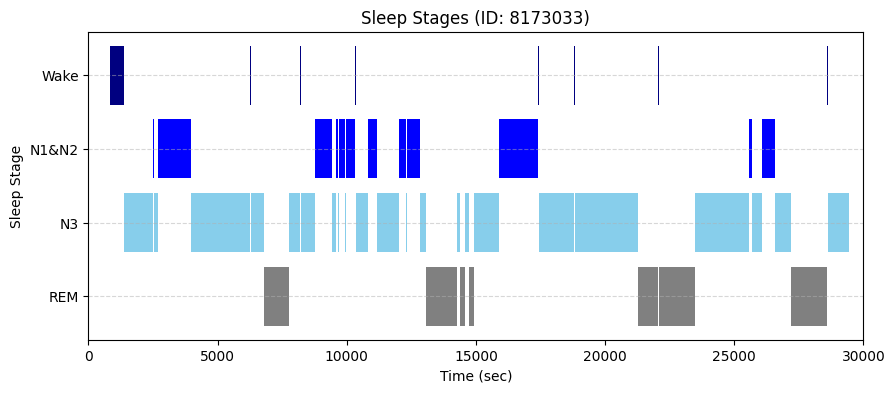

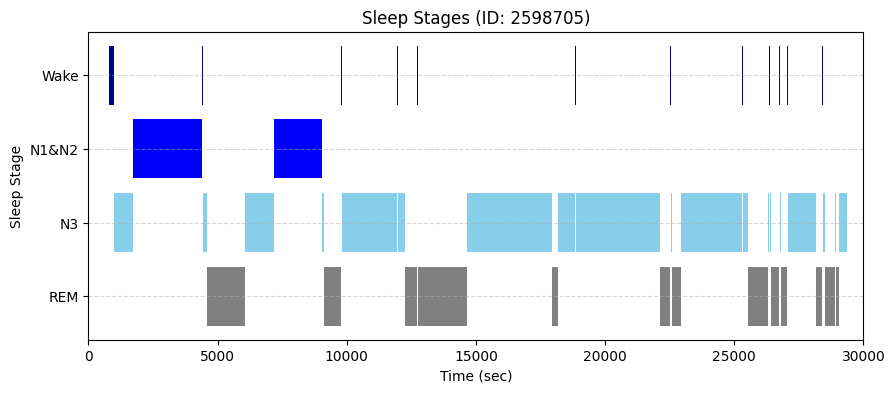

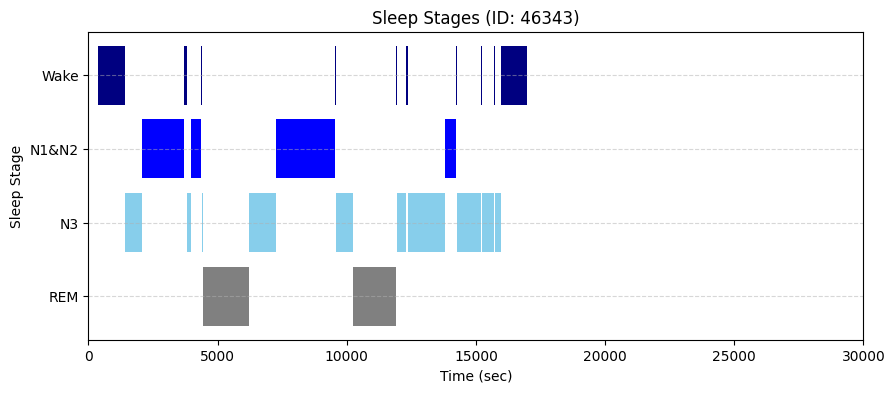

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

address = "csv_convert/data/labels"
path = os.listdir(address) 

random_idx = random.sample(range(0, 31), 3) 

for i in random_idx:
    file_path = os.path.join(address, path[i]) 
    person_id = path[i].split('_')[0] 

    label_file = np.loadtxt(file_path, delimiter=" ", unpack=False)

    # -1인 데이터 제외 (이상치 제거)
    valid_indices = label_file[:, 1] != -1
    time = label_file[valid_indices, 0]
    raw_label = label_file[valid_indices, 1]

    # 수면 단계 재매핑
    label_mapping = {0: 3, 1: 1, 2: 1, 3: 2, 4: 0, 5: 0}  #  # rem을 위로 보내고, wake를 밑으로 보내기 위해서
    mapped_label = np.array([label_mapping[val] for val in raw_label])

    # 그래프 설정
    plt.figure(figsize=(10, 4), dpi=100)

    # 수면 단계별 색상
    colors = {3: 'navy', 2: 'blue', 1: 'skyblue', 0: 'gray'}

    # 각 구간을 블록처럼 그리기
    for j in range(len(time) - 1):
        plt.barh(y=mapped_label[j], width=time[j + 1] - time[j], left=time[j], 
                 color=colors.get(mapped_label[j], "gray"), height=0.8)

    # 제목 및 축 설정
    plt.title(f"Sleep Stages (ID: {person_id})")  # 그래프 제목에 ID 추가
    plt.xlabel("Time (sec)")
    plt.ylabel("Sleep Stage")
    plt.xlim(0, 30000)
    plt.yticks([3, 2, 1, 0], ["Wake", "N1&N2", "N3", "REM"])  
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    plt.show()
